In [1]:
# Import packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl 
from scipy.integrate import odeint
import seaborn as sns

colors=sns.color_palette("Set2")
sns.palplot(sns.color_palette("Set2"))

# Figure Size Setting
def set_fig_size(fig_width_pt,nrow=1,ncol=1):
    #Ysize_over_Xsize=(np.sqrt(5)-1)/2
    Ysize_over_Xsize=3/4

    fig_width_in = fig_width_pt/72.27
    
    fig_height_in=fig_width_in*Ysize_over_Xsize*(nrow/ncol)
    fig_dim = (fig_width_in, fig_height_in)
    return fig_dim

# these numbers come from the latex document
# using the commands 
#\showthe\columnwidth
# \showthe\textwidth
colwidth=229.5
textwidth=469


%matplotlib inline

# FIGURE STYLING
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

mpl.rcParams['axes.linewidth'] = 0.5 
mpl.rcParams['xtick.major.size'] = 3
mpl.rcParams['ytick.major.size'] = 3

mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5


mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 9
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

# FIGURE 2

In [2]:
def gSteadyState_act(k4,k5p,s):
    num=k5p*s/(s+1)
    den=k4+k5p*s/(s+1)
    return num/den

def gSteadyState_derep(k3,k6p,s):
    num=k3
    den=k3+k6p/(s+1)
    return num/den

def gSteadyState_conc(k6p,rho,s):
    k5p=rho*k6p
    num=k5p*s/(s+1)
    den=k5p*s/(s+1)+k6p/(s+1)
    return num/den


k3=1
k4=1
k5pList=[1e-1, 1, 1e1, 1e2, 1e3]
sListact=np.logspace(-5,3,100)
sListderep=np.logspace(-3,5,100)
sListconc=np.logspace(-4,4,1000)
k6pList=[1e-1, 1, 1e1, 1e2, 1e3]

rhoList=[1e-2, 1e-1, 1, 1e1, 1e2]

k6p_conc=1

gSteadyState_activationList=[[gSteadyState_act(k4, k5p, s) for s in sListact] for k5p in k5pList]
getSteadyState_receptor_act=[s/(1+s) for s in sListact]


gSteadyState_derepressionList=[[gSteadyState_derep(k3, k6p, s) for s in sListderep] for k6p in k6pList]
getSteadyState_receptor_derep=[s/(1+s) for s in sListderep]

gSteadyState_concList=[[gSteadyState_conc(k6p_conc, rho, s) for s in sListconc] for rho in rhoList]
getSteadyState_receptor_conc=[s/(1+s) for s in sListconc]

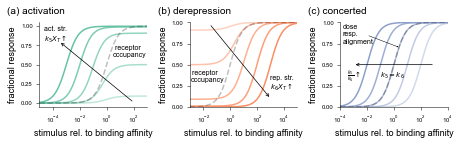

In [3]:
# this figure is full-width, which is 469 pts. may be different for PNAS 
#fig = plt.figure(figsize=set_fig_size(textwidth,1,3))

fig=plt.figure(figsize=(469/72.27,469/3/72.27))

gs = mpl.gridspec.GridSpec(1,3)

A = fig.add_subplot(gs[0,0])
B = fig.add_subplot(gs[0,1])
C = fig.add_subplot(gs[0,2])


A.semilogx(sListact, gSteadyState_activationList[0], color=colors[0],alpha=0.40)
A.semilogx(sListact, gSteadyState_activationList[1], color=colors[0],alpha=0.55)
A.semilogx(sListact, gSteadyState_activationList[2], color=colors[0],alpha=0.70)
A.semilogx(sListact, gSteadyState_activationList[3], color=colors[0],alpha=0.85)
A.semilogx(sListact, gSteadyState_activationList[4], color=colors[0],alpha=1.0)

    
A.semilogx(sListact, getSteadyState_receptor_act, '--',color='k',alpha=0.25)


A.set_xlim(1e-5,1e3)
A.set_yticks([0, 0.25, 0.5, 0.75, 1])
A.set_xticks([1e-4,1e-2, 1e0,1e2])


A.text(-0.3,1.1,'(a) activation',transform=A.transAxes,fontsize=10)

A.annotate('',
            xy=(100,0.01), size=7, xycoords='data',
            xytext=(3e-4, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="<-",lw=0.7))

A.text(2e-5,0.8, "act. str. \n"+r"$k_5 X_T \uparrow$",fontsize=7)

A.text(3,0.6," receptor\n"+"occupancy", fontsize=7)


A.set_xlabel('stimulus rel. to binding affinity')
A.set_ylabel('fractional response')


#for replist in gSteadyState_derepressionList:
    #B.semilogx(sListderep, replist, color=colors[1],linewidth=2)


B.semilogx(sListderep, gSteadyState_derepressionList[0], color=colors[1],alpha=0.40)
B.semilogx(sListderep, gSteadyState_derepressionList[1], color=colors[1],alpha=0.55)
B.semilogx(sListderep, gSteadyState_derepressionList[2], color=colors[1],alpha=0.70)
B.semilogx(sListderep, gSteadyState_derepressionList[3], color=colors[1],alpha=0.85)
B.semilogx(sListderep, gSteadyState_derepressionList[4], color=colors[1],alpha=1.0)


B.semilogx(sListderep, getSteadyState_receptor_derep, '--',color='k',alpha=0.25)
B.set_xlim(1e-3,1e5)
B.set_ylim(0,1)
B.set_yticks([0, 0.25, 0.5, 0.75, 1])
B.set_xticks([1e-2,1e0,1e2,1e4])




B.text(-0.3,1.1,'(b) derepression',transform=B.transAxes,fontsize=10)

B.annotate('',
            xy=(3e-2,0.98), size=7, xycoords='data',
            xytext=(1e3, 0.1), textcoords='data',
            arrowprops=dict(arrowstyle="<-",lw=0.7))

B.text(1e3,0.2, "rep. str. \n"+r"$k_6 X_T \uparrow$",fontsize=7)
B.text(1.1e-3,0.3," receptor\n"+"occupancy", fontsize=7)


B.set_xlabel('stimulus rel. to binding affinity')
B.set_ylabel('fractional response')



C.semilogx(sListconc, gSteadyState_concList[0], color=colors[2],alpha=0.40)
C.semilogx(sListconc, gSteadyState_concList[1], color=colors[2],alpha=0.55)
C.semilogx(sListconc, gSteadyState_concList[2], color=colors[2],alpha=0.70)
C.semilogx(sListconc, gSteadyState_concList[3], color=colors[2],alpha=0.85)
C.semilogx(sListconc, gSteadyState_concList[4], color=colors[2],alpha=1.0)

C.semilogx(sListconc, getSteadyState_receptor_conc, '--',color='k',alpha=0.25)

C.set_xlim(1e-4,1e4)
C.set_ylim(0,1)

C.set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.xticks([1e-4,1e-2,1e0,1e2,1e4])

C.text(-0.3,1.1,'(c) concerted',transform=C.transAxes,fontsize=10)

C.annotate('',
            xy=(1e3,0.5), size=7, xycoords='data',
            xytext=(1e-3, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="<-",lw=0.7))


C.annotate('',
            xy=(3,0.7), size=2, xycoords='data',
            xytext=(1e-2, 0.85), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",lw=0.5))


C.text(3e-4,0.35, r"$\frac{k_5}{k_6} \uparrow$",fontsize=7)
C.text(1e-1,0.35, r"$k_5=k_6$",fontsize=7)
C.text(1.5e-4,0.75,"dose\n"+"resp.\n"+"alignment",fontsize=7)



C.set_xlabel('stimulus rel. to binding affinity')
C.set_ylabel('fractional response')

gs.tight_layout(fig)
#plt.savefig('../fig_pdfs_for_paper/fig2.pdf',bbox_inches = 'tight', pad_inches = 0)

# FIGURE 2 (REVISION)

In [4]:
def gSteadyState_act(k4,k5p,s):
    num=k5p*s/(s+1)
    den=k4+k5p*s/(s+1)
    return num/den

def gSteadyState_derep(k3,k6p,s):
    num=k3
    den=k3+k6p/(s+1)
    return num/den

def gSteadyState_conc(k6p,rho,s):
    k5p=rho*k6p
    num=k5p*s/(s+1)
    den=k5p*s/(s+1)+k6p/(s+1)
    return num/den


k3=1
k4=1
k5pList=[1, 1e1, 1e2]
sListact=np.logspace(-4,3,100)
sListderep=np.logspace(-3,4,100)
sListconc=np.logspace(-3,3,1000)
k6pList=[1, 1e1, 1e2]

rhoList=[1e-1, 1, 1e1]

k6p_conc=1

gSteadyState_activationList=[[gSteadyState_act(k4, k5p, s) for s in sListact] for k5p in k5pList]
getSteadyState_receptor_act=[s/(1+s) for s in sListact]


gSteadyState_derepressionList=[[gSteadyState_derep(k3, k6p, s) for s in sListderep] for k6p in k6pList]
getSteadyState_receptor_derep=[s/(1+s) for s in sListderep]

gSteadyState_concList=[[gSteadyState_conc(k6p_conc, rho, s) for s in sListconc] for rho in rhoList]
getSteadyState_receptor_conc=[s/(1+s) for s in sListconc]

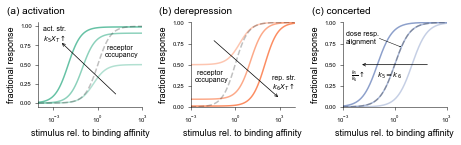

In [5]:
# this figure is full-width, which is 469 pts. may be different for PNAS 
#fig = plt.figure(figsize=set_fig_size(textwidth,1,3))

fig=plt.figure(figsize=(469/72.27,469/3/72.27))

gs = mpl.gridspec.GridSpec(1,3)

A = fig.add_subplot(gs[0,0])
B = fig.add_subplot(gs[0,1])
C = fig.add_subplot(gs[0,2])


A.semilogx(sListact, gSteadyState_activationList[0], color=colors[0],alpha=0.50)
A.semilogx(sListact, gSteadyState_activationList[1], color=colors[0],alpha=0.75)
A.semilogx(sListact, gSteadyState_activationList[2], color=colors[0],alpha=1)


    
A.semilogx(sListact, getSteadyState_receptor_act, '--',color='k',alpha=0.25)


A.set_xlim(1e-4,1e3)
A.set_yticks([0, 0.25, 0.5, 0.75, 1])
A.set_xticks([1e-3,1e0,1e3])


A.text(-0.3,1.1,'(a) activation',transform=A.transAxes,fontsize=10)

A.annotate('',
            xy=(20,0.1), size=7, xycoords='data',
            xytext=(3e-3, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="<-",lw=0.7))

A.text(2e-4,0.8, "act. str. \n"+r"$k_5 X_T \uparrow$",fontsize=7)

A.text(3,0.6," receptor\n"+"occupancy", fontsize=7)


A.set_xlabel('stimulus rel. to binding affinity')
A.set_ylabel('fractional response')


#for replist in gSteadyState_derepressionList:
    #B.semilogx(sListderep, replist, color=colors[1],linewidth=2)


B.semilogx(sListderep, gSteadyState_derepressionList[0], color=colors[1],alpha=0.50)
B.semilogx(sListderep, gSteadyState_derepressionList[1], color=colors[1],alpha=0.75)
B.semilogx(sListderep, gSteadyState_derepressionList[2], color=colors[1],alpha=1)



B.semilogx(sListderep, getSteadyState_receptor_derep, '--',color='k',alpha=0.25)
B.set_xlim(1e-3,1e4)
B.set_ylim(0,1)
B.set_yticks([0, 0.25, 0.5, 0.75, 1])
B.set_xticks([1e-3,1e0,1e3])




B.text(-0.3,1.1,'(b) derepression',transform=B.transAxes,fontsize=10)

B.annotate('',
            xy=(3e-2,0.8), size=7, xycoords='data',
            xytext=(1e3, 0.1), textcoords='data',
            arrowprops=dict(arrowstyle="<-",lw=0.7))

B.text(3e2,0.2, "rep. str. \n"+r"$k_6 X_T \uparrow$",fontsize=7)
B.text(2e-3,0.3," receptor\n"+"occupancy", fontsize=7)


B.set_xlabel('stimulus rel. to binding affinity')
B.set_ylabel('fractional response')



C.semilogx(sListconc, gSteadyState_concList[0], color=colors[2],alpha=0.50)
C.semilogx(sListconc, gSteadyState_concList[1], color=colors[2],alpha=0.75)
C.semilogx(sListconc, gSteadyState_concList[2], color=colors[2],alpha=1)


C.semilogx(sListconc, getSteadyState_receptor_conc, '--',color='k',alpha=0.25)

C.set_xlim(1e-3,1e3)
C.set_ylim(0,1)

C.set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.xticks([1e-3,1e0,1e3])

C.text(-0.3,1.1,'(c) concerted',transform=C.transAxes,fontsize=10)

C.annotate('',
            xy=(1e2,0.5), size=7, xycoords='data',
            xytext=(1e-2, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="<-",lw=0.7))


C.annotate('',
            xy=(3,0.7), size=2, xycoords='data',
            xytext=(1e-1, 0.82), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",lw=0.5))


C.text(3e-3,0.35, r"$\frac{k_5}{k_6} \uparrow$",fontsize=7)
C.text(1e-1,0.35, r"$k_5=k_6$",fontsize=7)
C.text(1.5e-3,0.75,"dose resp.\n"+"alignment",fontsize=7)



C.set_xlabel('stimulus rel. to binding affinity')
C.set_ylabel('fractional response')

gs.tight_layout(fig)
plt.savefig('../fig_pdfs_for_paper/fig2.pdf',bbox_inches = 'tight', pad_inches = 0)